In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('London Housing Data.csv')

# DATA EXPLORATION  

In [3]:
df.shape

(13549, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


# check null value

In [5]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [6]:
#df[df['houses_sold'].isnull()].index.tolist()
#df[df['no_of_crimes'].isnull()].index.tolist()


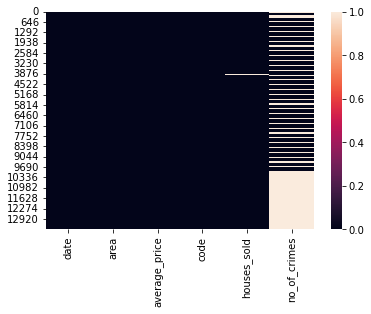

In [7]:
sns.heatmap(df.isnull())
plt.show()

# check format

In [8]:
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])


In [10]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

# Add new column contain years only

In [11]:
df['year'] = df.date.dt.year

In [12]:
df

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


# show all records where no.of.crime = 0 and how much such records are there ?

In [13]:
df[df['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes,year
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001
...,...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0,2009
179,2009-12-01,city of london,411955,E09000001,16.0,0.0,2009
180,2010-01-01,city of london,464436,E09000001,20.0,0.0,2010
181,2010-02-01,city of london,490525,E09000001,9.0,0.0,2010


In [14]:
len(df[df['no_of_crimes']==0])

104

# What is max and min (average price / year in england )


In [15]:
df['year'].value_counts()

1998    542
1996    542
1995    540
2009    540
2019    540
2018    540
2017    540
2016    540
2015    540
2014    540
2013    540
2012    540
2011    540
2010    540
2008    540
2007    540
2006    540
2005    540
2004    540
2003    540
2002    540
2001    540
2000    540
1999    540
1997    540
2020     45
Name: year, dtype: int64

In [16]:
df.groupby('year').average_price.max().sort_values(ascending = True)


year
1995     200722
1996     223197
1997     265112
1998     277600
1999     354241
2000     397353
2001     451028
2003     488704
2002     497538
2005     555847
2004     559286
2006     644541
2009     782459
2007     830950
2008     832753
2010     884674
2011     959520
2012    1077366
2020    1178166
2013    1217729
2019    1294113
2015    1353679
2016    1357231
2014    1365050
2017    1412255
2018    1463378
Name: average_price, dtype: int64

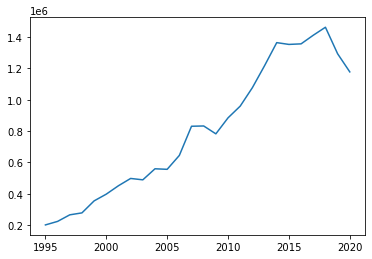

In [17]:
a =  df.groupby('year').average_price.max()
plt.plot(a)
plt.show()

In [18]:
df.groupby('year').average_price.min().sort_values(ascending = True)

year
1996     40722
1995     41688
1997     42353
1998     43510
1999     43969
2000     47604
2001     49045
2002     54746
2003     67520
2004     88520
2005    110454
2013    112008
2012    113011
2014    114531
2011    115328
2009    117079
2015    117156
2010    119688
2008    120275
2016    121085
2006    121124
2017    121858
2018    124038
2019    124567
2020    126592
2007    131175
Name: average_price, dtype: int64

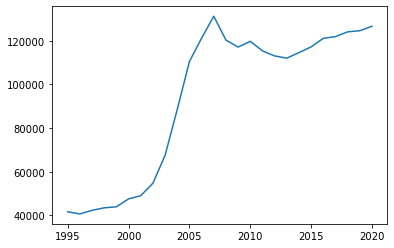

In [19]:
b =  df.groupby('year').average_price.min()
plt.plot(b)
plt.show()

# What is max and min number of crimes per year


In [20]:
 df.groupby('year').no_of_crimes.max().sort_values(ascending=True)

year
2014    4478.0
2015    4561.0
2016    4903.0
2013    5047.0
2017    5198.0
2006    5467.0
2007    5509.0
2008    5578.0
2009    5703.0
2005    5753.0
2010    5766.0
2012    5972.0
2011    6106.0
2003    6149.0
2004    6290.0
2020    6405.0
2018    6743.0
2001    7002.0
2002    7076.0
2019    7461.0
1995       NaN
1996       NaN
1997       NaN
1998       NaN
1999       NaN
2000       NaN
Name: no_of_crimes, dtype: float64

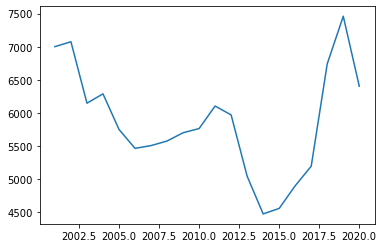

In [21]:
x =  df.groupby('year').no_of_crimes.max()
plt.plot(x)
plt.show()

In [22]:
df.groupby('year').no_of_crimes.min().sort_values(ascending=True)

year
2001       0.0
2009       0.0
2008       0.0
2007       0.0
2006       0.0
2010       0.0
2004       0.0
2003       0.0
2002       0.0
2005       0.0
2014     692.0
2013     740.0
2015     763.0
2012     774.0
2011     790.0
2016     795.0
2017     868.0
2018     898.0
2019     974.0
2020    1124.0
1995       NaN
1996       NaN
1997       NaN
1998       NaN
1999       NaN
2000       NaN
Name: no_of_crimes, dtype: float64

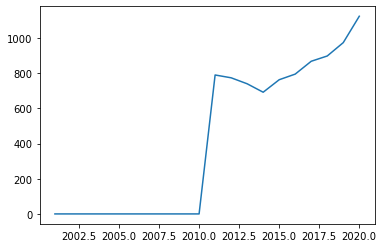

In [23]:
y =  df.groupby('year').no_of_crimes.min()
plt.plot(y)
plt.show()

# show the total count of records of each area , where average price is less than 100000

In [24]:
df[df['average_price']< 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              

In [25]:
df.corr()

,average_price,houses_sold,no_of_crimes,year
average_price,1.000000,-0.168256,0.113835,0.664045
houses_sold,-0.168256,1.000000,0.246839,-0.034938
no_of_crimes,0.113835,0.246839,1.000000,-0.115136
year,0.664045,-0.034938,-0.115136,1.000000


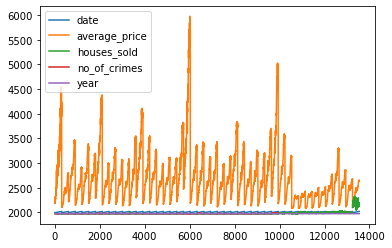

In [26]:
df.plot()
plt.show()

In [27]:
df.to_excel('London.xlsx', sheet_name='sheet1', index=False)


In [37]:
b =  df.groupby('year').average_price.min()
